# <font color=black> Spinal cord networks: iCAPs </font>
<hr style="border:1px solid black">

**The goal of this analysis is to extract spinal networks using iCAPs.**

**1 Plot maps:**

**2. Create masks:**


In [89]:
import sys,json
import glob
import pandas as pd
import numpy as np
import nibabel as nib
import seaborn as sns
import os 
from matplotlib import pyplot as plt

#sys.path.append('/media/miplab-nas2/Data3/BMPD/hc_project/analysis/code/')
sys.path.append('/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/code/')

from plotting import Plotting
#from spine_only_analysis import SpineOnlyAnalysis

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<hr style="border:1px solid black">

# Initialization

### Load configuration file 

In [90]:
# Load the config files with all informations (i.e., all datasets, methods, etc.)
with open('../../config/config_spine_only_CL.json') as config_file:
    config = json.load(config_file)
    
#with open('../config/config_spine_only_CL.json') as config_file:
#    config = json.load(config_file)
    

<hr style="border:1px solid black">

# Plot the components

In [102]:
# Define parameters for the dataset to visualize
# Note: it is possible to look at a single dataset (in that case, just define params1), or to compare two (in that case, also add params2)
# Each param dict has 3 values: k, dataset and analysis
params_icap = {'k':9, 'dataset':'brain_sc', 'analysis':'icap', 'lthresh':1.6}
params_icap2 = {'k':9, 'dataset':'mtl', 'analysis':'icap', 'lthresh':1.6}

plotting_ica = Plotting(config,'spinalcord',params1=params_icap,params2=params_icap2)

Sorting method: rostrocaudal (max value)
Sorting method: rostrocaudal (max value)


The plotting will be displayed in neurological orientation (Left > Right)
COMPUTING SIMILARITY WITH METHOD: Dice
...Compute similarity between pairs of components
...Ordering components based on maximum weight matching
DONE!


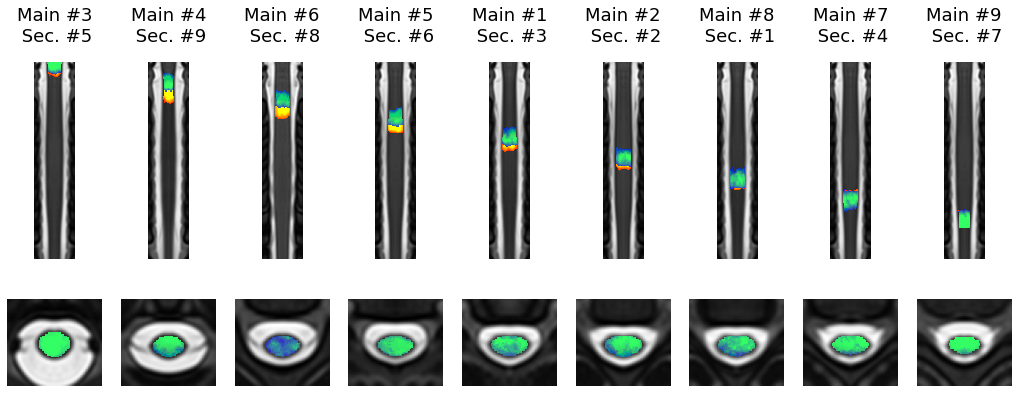

In [103]:
#plotting_robustness_gva.sc_plot(show_spinal_levels=False, k_per_line=5, lthresh=1.6, uthresh=3.5, save_results=True, similarity_method='Dice', template=config['main_dir']+'/templates/PAM50_hc_project/template/T2w_gva_group_mean_resampled.nii.gz')
plotting_ica.sc_plot(show_spinal_levels=False, k_per_line=9, lthresh=1.6, uthresh=3.5, save_results=False,similarity_method='Dice')


_Note: the component numbers refer to the ones of the original datasets (i.e., before any type of reordering)_

# Create binary masks
To create the mask for the icap
> Pre-define which the component order in the spinal order (i.e k_levels=[5,3] means that sc level 1 correspond to compo #5, sc 2 to compo #3)  
> Split 4D image in multiple 3D images  
> threshold and binarize the 3D images to create the masks. This step will also rename the bin image with the corresponding spinal level

In [104]:
k_levels=[3,4,6,5,1,2,8,7,9] # put the k number in the spinal level order for exemple put 5 in first place if the compo 5 reflect the 1rst spinal level

In [105]:
# split 4D image in multiple 3D images ________________________________________
for k in [9]:
    iCAPs_4D=config['main_dir']+config['data']["brain_sc"]["icap"]["spinalcord"]['dir']  + '/K_' + str(k) + '/comp_zscored/iCAPs_z.nii'
    iCAPs_3D_basename=config['main_dir']+config['data']["brain_sc"]["icap"]["spinalcord"]['dir']  + '/K_' + str(k) + '/comp_zscored/iCAPs_z'
    
    if not os.path.exists(iCAPs_3D_basename + "0000.nii.gz"):
        string_split='fslsplit ' + iCAPs_4D + " " + iCAPs_3D_basename + " -t"
        os.system(string_split)


In [107]:
# Threshold and binarize the image to create the masks
for k in range(0,len(k_levels)):
    k_level=k_levels[k]
    for file_3D in glob.glob(config['main_dir']+config['data']["brain_sc"]["icap"]["spinalcord"]['dir']  + '/K_' + str(len(k_levels)) + '/comp_zscored/*000*'):
        if str(int(file_3D.split('/')[-1][10])+1) == str(k_level):
            print("spinal level " + str(k+1) + " => iCAPs " + str(int(file_3D.split('/')[-1][10])+1))
            tag_output="spinalcord_C" + str(k+1)
            bin_file= config['main_dir'] + 'hc_project_analyses/mask/spinalcord/iCAPs/' + tag_output + "_bin.nii.gz"
            if not os.path.exists(bin_file):
                string_bin='fslmaths ' +file_3D+ ' -thr 2 -bin ' + bin_file
                os.system(string_bin)

spinal level 1 => iCAPs 3
spinal level 2 => iCAPs 4
spinal level 3 => iCAPs 6
spinal level 4 => iCAPs 5
spinal level 5 => iCAPs 1
spinal level 6 => iCAPs 2
spinal level 7 => iCAPs 8
spinal level 8 => iCAPs 7
spinal level 9 => iCAPs 9
